In [4]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Read Data files
df_data = pd.read_csv('modified.csv')

temp = df_data
df_data.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,hour_modified
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,...,1,0,0,0,0,0,0,0,0,20000
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,...,0,0,0,0,0,0,0,0,0,10000
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,...,0,0,0,0,0,0,0,0,0,190000
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,...,0,0,0,0,0,0,0,0,0,160000
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,...,0,0,0,0,0,0,0,0,0,180000


In [6]:
X = temp.drop(['user','first_open','screen_list','enrolled',
               'enrolled_date','hour_modified'], axis = 1)
y = df_data.loc[:,['enrolled']]

In [7]:
#Creating categorical to contimuous variables
X = pd.get_dummies(X, columns = ['hour'], drop_first = True)

## Split Dataset into Train and Test Set

In [8]:
#Spliting the dataset into test and training set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)


## Dimension Reduction - Principal Component Analysis(PCA)

In [9]:
#Applying Dimension Reduction - Principal Component Analysis(PCA)
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

## Logistic Regression

In [10]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

C:\Users\aggar\Anaconda3\envs\MachineLearning\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aggar\Anaconda3\envs\MachineLearning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Prediction on TRAIN Set

In [11]:
#Predicting on TRAIN set
y_pred_train = classifier.predict(X_train)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train,y_pred_train)
print(confusion_matrix)

[[ 7577  5695]
 [ 4751 16977]]


In [12]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_train, y_pred_train)
print('Accuracy of train set is {0}'.format(acc))

Accuracy of train set is 0.7015428571428571


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.61      0.57      0.59     13272
           1       0.75      0.78      0.76     21728

    accuracy                           0.70     35000
   macro avg       0.68      0.68      0.68     35000
weighted avg       0.70      0.70      0.70     35000



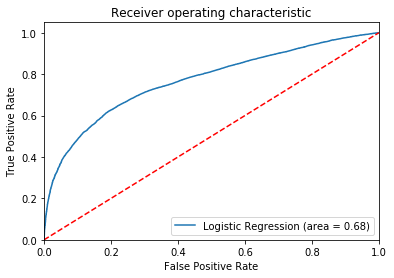

In [14]:
#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_train, y_pred_train)
fpr, tpr, thresholds = roc_curve(y_train, classifier.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Predicting on TEST Set

In [16]:
y_pred = classifier.predict(X_test)

#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[3221 2433]
 [1984 7362]]


In [17]:
#Accuracy score
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print('Accuracy of Test set is {0}'.format(acc))

Accuracy of Test set is 0.7055333333333333


In [18]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.57      0.59      5654
           1       0.75      0.79      0.77      9346

    accuracy                           0.71     15000
   macro avg       0.69      0.68      0.68     15000
weighted avg       0.70      0.71      0.70     15000



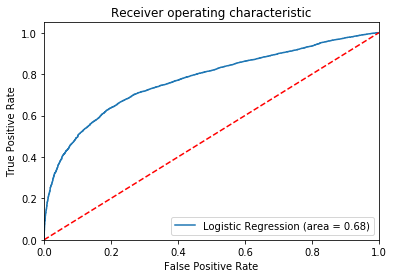

In [19]:
#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

(0, 1)

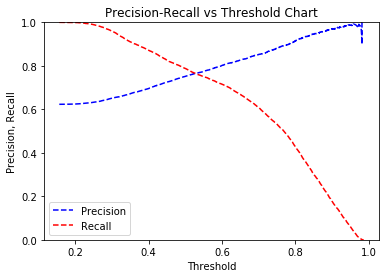

In [20]:
### AUC Curve
pred_y=classifier.predict(X_test) 
probs_y=classifier.predict_proba(X_test) 
from sklearn.metrics import precision_recall_curve,auc
precision, recall, thresholds = precision_recall_curve(y_test, probs_y[:, 1]) 
   #retrieve probability of being 1(in second column of probs_y)
pr_auc = auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])